#CSE5DL Assignment

### Assignment due date: Friday 31/5/2024

Penalties are applied to late assignments (accepted up to 5 business days after the due date only). Five percent is deducted per business day late. A mark of zero will be assigned to assignments submitted more than 5 days late.

<font color='red'> This is an individual assignment. You are not permitted to work as a part of a group when writing this assignment. </font>

### Assignment submission

Please zip all `*.ipynb`, `*.py`, `*.docx` and `*.xlsx` files into a single zip file and submit the zipped file via the link provided on LMS.

### Copying, Plagiarism
Plagiarism is the submission of somebody else’s work in a manner that gives the impression that the work is your own. For individual assignments, plagiarism includes the case where two or more students work collaboratively on the assignment.  The Department of Computer Science and Information Technology treats plagiarism very seriously.  When it is detected, penalties are strictly imposed.

### ChatGPT
A key purpose of this assessment task is to test your own ability to complete the assigned tasks.  Therefore, the use of ChatGPT, AI tools or chatbots with similar functionality is prohibited for this assessment task. Students who are found to be in breach of this rule will be subject to normal academic misconduct measures.  Additionally, students may be engaged to provide an oral validation of their understanding of their submitted work (e.g. coding).


### Checklist of files you need to modify and submit
1. This ipynb notebook with the cells fill in.
2. Fill in the TODO code in the following python files:

    a. train.py

    b. models.py
     
    c. datasets.py
      
    d. visualize_embeddings.py
3. Filled in written report.
4. Wandb report
5. Excel spreadsheet with details of 10 model training runs for task 1f (similar to spreadsheet for lab 3).
6. The rest of .py files that you do not modify.


# Introduction

**DESCRIPTION:** In this assignment we have provided you with skeleton code. We have an image dataset and a text dataset, and you must train deep learning models for them. With the exception of Task 2b, all of the code required has already been shown to you in the labs.

In this assignment you will be required to write code and write short answer responses to questions in a structured report. You have been provided with a template Word document of this report in which you simply have to fill in the blanks (1-3 sentences is expected).

Throughout this assignment, there are a few challenge questions worth bonus marks. Task 1 is worth 66 marks and Task 2 is worth 32 marks, totalling 98 marks possible before challenge questions. You can receive up to 10 marks from the bonus questions, so the maximum number of marks you can get is 108. However if you get over 100 marks the actual mark you will receive is 100% for the assignment assessment component of your grades.  Unless otherwise stated all marks quoted do not include challenge questions.

There are 71 marks associated with code and 27 marks associated with the report.

**INSTRUCTIONS:**

1.   Copy the skeleton files to your Google Drive.
2.   Edit `SKELETON_DIR` in the first cell to point to the skeleton files you uploaded in step 1. The provided code assumes you have uploaded them to "Uni/CSE5DL/Assignment" in your Google Drive.
3.   Run the following two cells


In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
#SKELETON_DIR = '/content/drive/MyDrive/Uni/CSE5DL/Assignment'
SKELETON_DIR = '/content/drive/MyDrive/Colab Notebooks'

os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q transformers==4.27.0
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3


# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.4 MB/s eta 0:00:00


In [2]:
%%shell
DATA_URL='https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1'

pushd /content
wget -O data.zip $DATA_URL
unzip -q data.zip
popd

/content /content/drive/MyDrive/Colab Notebooks
--2024-06-12 14:39:26--  https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1
Resolving latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1 [following]
--2024-06-12 14:39:27--  https://latrobeuni-my.sharepoint.com/personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1
Reusing existing connection to latrobeuni-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>] 994.88M  63.3MB/s    in 18s     

2024-06-12 14:39:45 (54.2 MB/

# Task 1 - Image Classification

**MARKS**: 66

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

**NOTE**: To explore the labels, you can click the above hyperlinks to open the relevant csv file.

## Task 1a. Explore the training set

**MARKS**: 5 (Code 3, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

In [3]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')
train_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.describe()


,MEL,NV,BCC,AKIEC,BKL,DF,VASC
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,0.088881,0.683089,0.050266,0.037949,0.112850,0.011984,0.014980
std,0.284620,0.465350,0.218530,0.191106,0.316461,0.108832,0.121493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


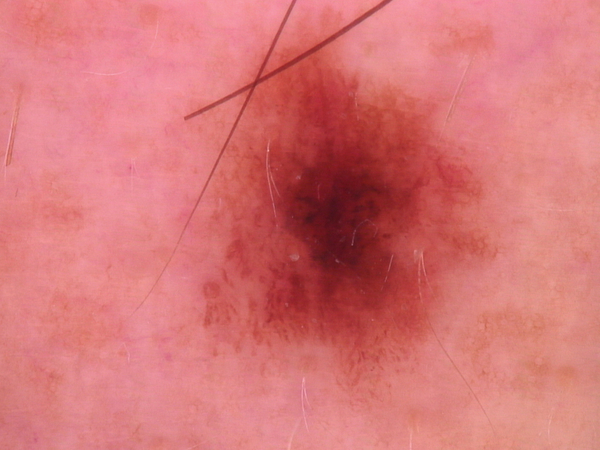

In [ ]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024306.jpg'))

First few rows of the training DataFrame:
          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0

First few rows of the validation DataFrame:
          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0027310  0.0  0.0  0.0    0.0  1.0  0.0   0.0
1  ISIC_0027311  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0027312  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0027313  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0027314  0.0  1.0  0.0    0.0  0.0  0.0   0.0

First few training labels: [1 1 1 1 0]
First few validation labels: [4 1 1 1 1]


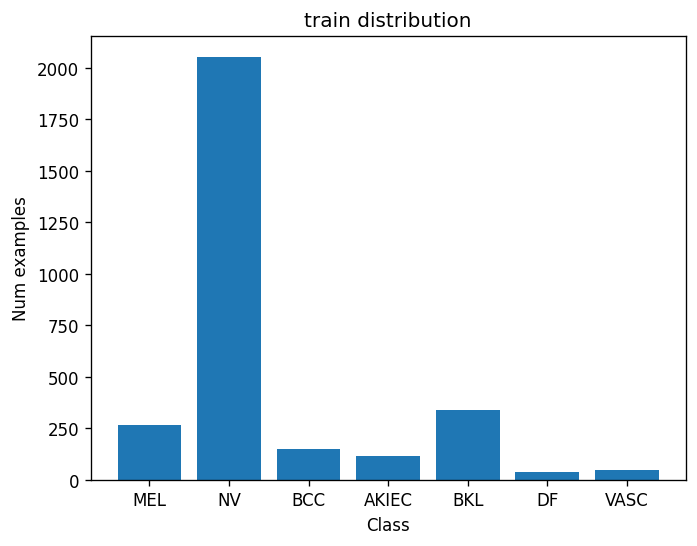

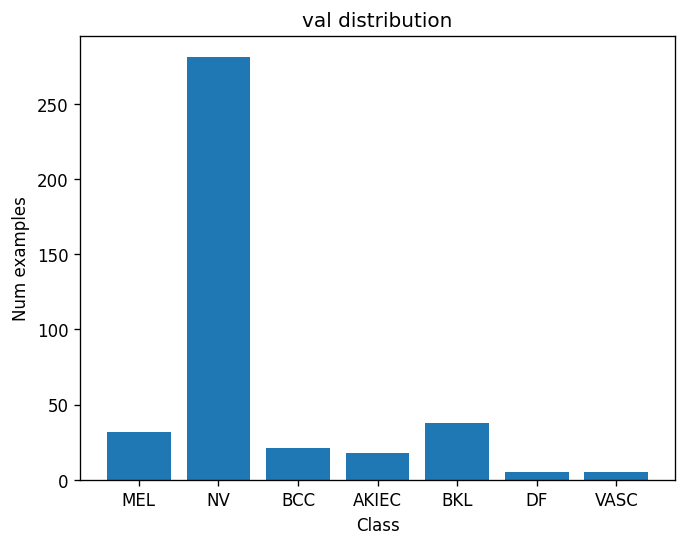


Missing values in the training set:
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64

Missing values in the validation set:
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64

Number of duplicate rows in the training set:
0

Number of duplicate rows in the validation set:
0


In [6]:
#import
#from explore import plot_label_distribution
# TODO - Check for data issues
# Hint: You can convert from one-hot to integers with argmax
#       This way you can convert 1, 0, 0, 0, 0, 0, 0  to class 0
#                                0, 1, 0, 0, 0, 0, 0  to class 1
#                                0, 0, 1, 0, 0, 0, 0  to class 2

# Verifying the first few rows of the DataFrame
print("First few rows of the training DataFrame:")
print(train_df.head())

print("\nFirst few rows of the validation DataFrame:")
print(val_df.head())

# so it should be something like the following:
# train_labels = train_df.values[....].argmax(....)
# val_labels = val_df.values[....].argmax(....)

# Converting one-hot encoded labels to integers using argmax
train_labels = train_df.iloc[:, 1:].values.argmax(axis=1)
val_labels = val_df.iloc[:, 1:].values.argmax(axis=1)

# verifying
print("\nFirst few training labels:", train_labels[:5])
print("First few validation labels:", val_labels[:5])



#     - you need to fill in the ... parts with the correct values.
# You should then print output the contents of train_labels to see if
# it matches the contents of train.csv
#
# Next you can plot the class distributions like the following:
# explore.plot_label_distribution(....)
#    - do the above for both the train and val labels.

import matplotlib.pyplot as plt

#function from explore.py
def plot_label_distribution(labels, split, class_names):
    counts = [sum(labels == c) for c in range(len(class_names))]
    plt.title(f'{split} distribution')
    plt.bar(class_names, counts)
    plt.xlabel('Class')
    plt.ylabel('Num examples')
    plt.show()

# Plotting the class distribution using the function from explore.py
class_names = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

plot_label_distribution(train_labels, 'train', class_names)
plot_label_distribution(val_labels, 'val', class_names)



# Following this look for other potential problems with the data
#   You can look at lab 2a to see what was checked there.
#   You may also think of any other potential problems with the data.
# Checking for missing values
print("\nMissing values in the training set:")
print(train_df.isnull().sum())

print("\nMissing values in the validation set:")
print(val_df.isnull().sum())

# Checking for duplicates
print("\nNumber of duplicate rows in the training set:")
print(train_df.duplicated().sum())

print("\nNumber of duplicate rows in the validation set:")
print(val_df.duplicated().sum())


## Task 1b. Implement Training loop

**MARKS**: 17 (Code 15, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not use* `random_split` in your code here?

In [10]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']

        # Check if image_ids are strings; if not, convert them
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)

        self.labels = self.labels_df.iloc[:, 1:].values

        # Define transformations based on the augment flag
        if augment:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
            ])


    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()  # Convert one-hot encoded labels to class index
        return image, label




In [9]:
# Create the dataset with the transformations
ds = LesionDataset('/content/data/img', '/content/data/img/train_small.csv', transform=train_transforms)

input, label = ds[0]
print(input)
print(label)


NameError: name 'train_transforms' is not defined

## Task 1c. Implement a baseline convolutional neural network

**MARKS**: 17 (Code 12, Reports 5)

You will implement a baseline convolutional neural network which you can compare results to. This allows you to evaluate any improvements made by hyperparameter tuning or transfer learning.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   5 `nn.Conv2d` layers, with 8, 16, 32, 64, 128 output channels respectively, with the following between each convolution layer:
        *   `nn.ReLU()` for the activation function, and
        *   `nn.BatchNorm2d`, and
        *   finally a `nn.MaxPool2d` to downsample by a factor of 2.
*   Use a normalised confusion matrix on the model's validation predictions in `train.py`.
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 1 minute/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long each epoch takes - for debugging purposes - while still using real data and using the real training code.

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong.
(Right-click a plot and select "save image as..." to save the image to your computer)

Current working directory: /content/drive/MyDrive/Colab Notebooks
Contents of the current directory: ['UNI', 'labs', 'Copy of Assignment.ipynb', 'saved_models', 'logs', 'wandb']
Contents of the data directory: ['ISIC_0027592.jpg', 'ISIC_0024708.jpg', 'ISIC_0024654.jpg', 'ISIC_0027306.jpg', 'ISIC_0025150.jpg', 'ISIC_0024812.jpg', 'ISIC_0025678.jpg', 'ISIC_0026927.jpg', 'ISIC_0027553.jpg', 'ISIC_0024889.jpg', 'ISIC_0024846.jpg', 'ISIC_0025203.jpg', 'ISIC_0026331.jpg', 'ISIC_0025754.jpg', 'ISIC_0027505.jpg', 'ISIC_0024742.jpg', 'ISIC_0025335.jpg', 'ISIC_0024346.jpg', 'ISIC_0027436.jpg', 'ISIC_0026157.jpg', 'ISIC_0026828.jpg', 'ISIC_0025880.jpg', 'ISIC_0026122.jpg', 'ISIC_0027571.jpg', 'ISIC_0024978.jpg', 'ISIC_0026317.jpg', 'ISIC_0024620.jpg', 'ISIC_0024363.jpg', 'ISIC_0026253.jpg', 'ISIC_0025434.jpg', 'ISIC_0027375.jpg', 'ISIC_0027274.jpg', 'ISIC_0026444.jpg', 'ISIC_0027384.jpg', 'ISIC_0027130.jpg', 'ISIC_0026573.jpg', 'ISIC_0025769.jpg', 'ISIC_0025656.jpg', 'ISIC_0026247.jpg', 'ISIC_002

  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1/5
Epoch 1/5
Train Loss: 0.929, Accuracy: 0.690, UAR: 0.200
Val Loss: 0.801, Accuracy: 0.708, UAR: 0.265
Starting epoch 2/5
Epoch 2/5
Train Loss: 0.783, Accuracy: 0.724, UAR: 0.273
Val Loss: 0.793, Accuracy: 0.708, UAR: 0.331
Starting epoch 3/5
Epoch 3/5
Train Loss: 0.709, Accuracy: 0.743, UAR: 0.323
Val Loss: 0.725, Accuracy: 0.738, UAR: 0.321
Starting epoch 4/5
Epoch 4/5
Train Loss: 0.668, Accuracy: 0.756, UAR: 0.370
Val Loss: 0.676, Accuracy: 0.730, UAR: 0.326
Starting epoch 5/5
Epoch 5/5
Train Loss: 0.624, Accuracy: 0.775, UAR: 0.452
Val Loss: 0.715, Accuracy: 0.723, UAR: 0.309


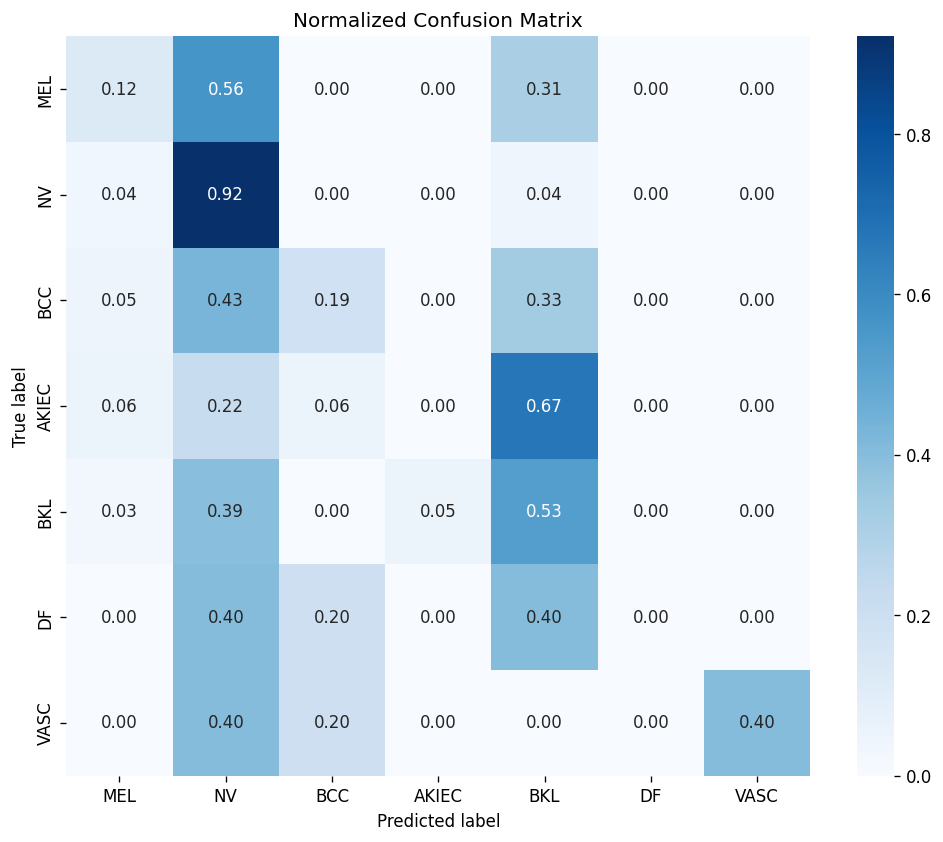

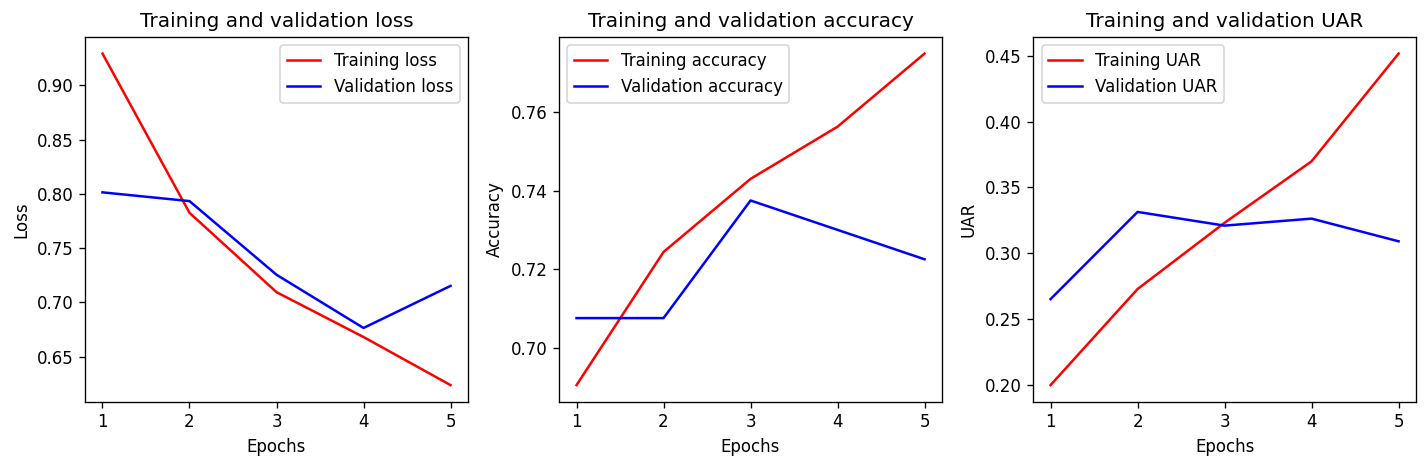

In [15]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns
import numpy as np

# Setting up device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Defining the LesionDataset class
class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        # Check if image_ids are strings; if not, convert them
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

# Define the function to plot label distribution
def plot_label_distribution(labels, split, class_names):
    counts = [sum(labels == c) for c in range(len(class_names))]
    plt.title(f'{split} distribution')
    plt.bar(class_names, counts)
    plt.xlabel('Class')
    plt.ylabel('Num examples')
    plt.show()

def train_epoch(epoch, model, optimizer, criterion, loader, device):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    for inputs, lbls in loader:
        inputs, lbls = inputs.to(device), lbls.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += lbls.size(0)
        correct += (predicted == lbls).sum().item()
        all_labels.extend(lbls.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    train_loss /= len(loader.dataset)

    metrics_dict = {
        'Loss_train': train_loss,
        'Accuracy_train': accuracy,
        'UAR_train': uar,
    }

    return metrics_dict

def val_epoch(epoch, model, criterion, loader, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, lbls in loader:
            inputs, lbls = inputs.to(device), lbls.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, lbls)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
            all_labels.extend(lbls.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    val_loss /= len(loader.dataset)
    cm = confusion_matrix(all_labels, all_preds, normalize='true')

    metrics_dict = {
        'Loss_val': val_loss,
        'Accuracy_val': accuracy,
        'UAR_val': uar,
    }

    return metrics_dict, cm

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Normalized Confusion Matrix')
    plt.show()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses, train_accuracies, train_uars = [], [], []
    val_losses, val_accuracies, val_uars = [], [], []

    class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

    for epoch in tqdm(range(num_epochs)):
        print('Starting epoch %d/%d' % (epoch + 1, num_epochs))
        train_metrics = train_epoch(epoch, model, optimizer, criterion, train_loader, device)
        val_metrics, cm = val_epoch(epoch, model, criterion, val_loader, device)

        print('Epoch %d/%d' % (epoch + 1, num_epochs))
        print('Train Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (train_metrics["Loss_train"], train_metrics["Accuracy_train"], train_metrics["UAR_train"]))
        print('Val Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (val_metrics["Loss_val"], val_metrics["Accuracy_val"], val_metrics["UAR_val"]))

        # metrics for plotting
        train_losses.append(train_metrics['Loss_train'])
        train_accuracies.append(train_metrics['Accuracy_train'])
        train_uars.append(train_metrics['UAR_train'])
        val_losses.append(val_metrics['Loss_val'])
        val_accuracies.append(val_metrics['Accuracy_val'])
        val_uars.append(val_metrics['UAR_val'])

    plot_confusion_matrix(cm, class_names)

    return train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars

# Defining the SimpleBNConv model
class SimpleBNConv(nn.Module):
    def __init__(self, num_classes):
        super(SimpleBNConv, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = self.pool(self.relu(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Checking and printing current working directory and its contents
print("Current working directory:", os.getcwd())
print("Contents of the current directory:", os.listdir())

# Defining the directory paths, just to be sure
data_dir = '/content/data/img'

# Checking and printing the contents of the data directory
if os.path.exists(data_dir):
    print("Contents of the data directory:", os.listdir(data_dir))
else:
    print(f"Directory {data_dir} does not exist.")

# Testing the LesionDataset implementation
ds = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'))
input, label = ds[0]
print(input)
print(label)

# Loading datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'))
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'))

# Creating DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Instantiating and moving the model to the device
num_classes = 7
model = SimpleBNConv(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model for 5 epochs and collect metrics
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

# Plotting
epochs = range(1, 6)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, train_uars, 'r', label='Training UAR')
plt.plot(epochs, val_uars, 'b', label='Validation UAR')
plt.title('Training and validation UAR')
plt.xlabel('Epochs')
plt.ylabel('UAR')
plt.legend()

plt.tight_layout()
plt.show()



## Task 1d. Account for data issues

> Indented block



**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1/5
Epoch 1/5
Train Loss: 1.443, Accuracy: 0.469, UAR: 0.469
Val Loss: 1.860, Accuracy: 0.188, UAR: 0.291
Starting epoch 2/5
Epoch 2/5
Train Loss: 1.020, Accuracy: 0.645, UAR: 0.648
Val Loss: 1.023, Accuracy: 0.608, UAR: 0.516
Starting epoch 3/5
Epoch 3/5
Train Loss: 0.784, Accuracy: 0.752, UAR: 0.752
Val Loss: 0.960, Accuracy: 0.625, UAR: 0.525
Starting epoch 4/5
Epoch 4/5
Train Loss: 0.623, Accuracy: 0.813, UAR: 0.813
Val Loss: 0.956, Accuracy: 0.657, UAR: 0.565
Starting epoch 5/5
Epoch 5/5
Train Loss: 0.524, Accuracy: 0.849, UAR: 0.848
Val Loss: 0.988, Accuracy: 0.632, UAR: 0.538


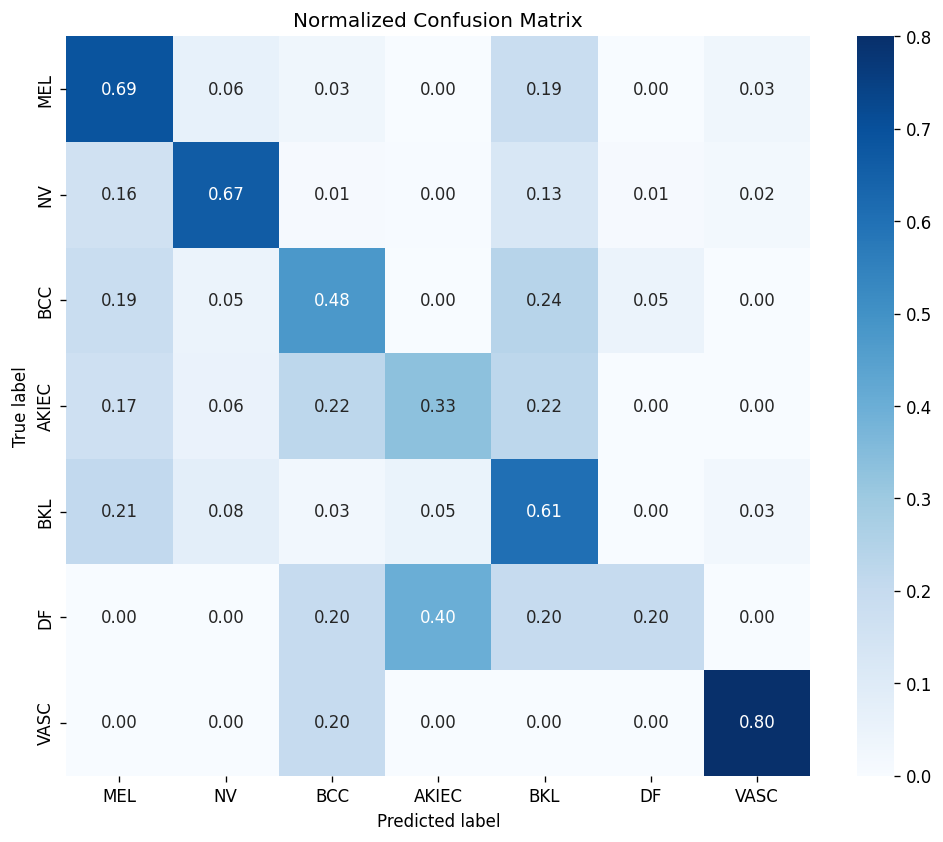

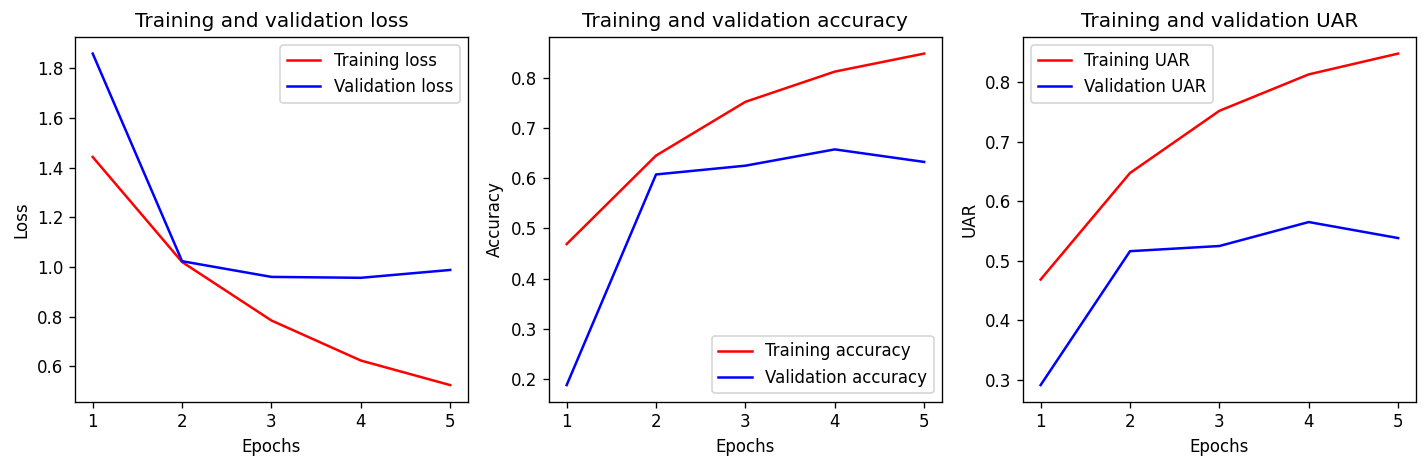

In [12]:
#DefinING the WeightedRandomSampler

from torch.utils.data.sampler import WeightedRandomSampler

# Calculate class weights
def get_class_weights(labels):
    class_counts = np.bincount(labels)
    total_samples = len(labels)
    class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
    return class_weights

# Calculate sample weights
def get_sample_weights(labels, class_weights):
    sample_weights = [class_weights[labels[i]] for i in range(len(labels))]
    return sample_weights

# Loading datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'))
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'))

# Get labels from the dataset
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Calculate class and sample weights
class_weights = get_class_weights(train_labels)
sample_weights = get_sample_weights(train_labels, class_weights)

# Creating the WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

#CreatING the DataLoader WITH NEW SAMPLER

train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

#MODEL TRAINING
# Instantiate and move the model to the device
num_classes = 7
model = SimpleBNConv(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model for 10 epochs and collect metrics
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

# Plotting
epochs = range(1, 6)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, train_uars, 'r', label='Training UAR')
plt.plot(epochs, val_uars, 'b', label='Validation UAR')
plt.title('Training and validation UAR')
plt.xlabel('Epochs')
plt.ylabel('UAR')
plt.legend()

plt.tight_layout()
plt.show()

## Task 1e. Data Augmentation

**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**:

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1/5
Epoch 1/5
Train Loss: 1.459, Accuracy: 0.453, UAR: 0.454
Val Loss: 1.752, Accuracy: 0.212, UAR: 0.394
Starting epoch 2/5
Epoch 2/5
Train Loss: 0.980, Accuracy: 0.680, UAR: 0.682
Val Loss: 1.176, Accuracy: 0.552, UAR: 0.574
Starting epoch 3/5
Epoch 3/5
Train Loss: 0.758, Accuracy: 0.762, UAR: 0.763
Val Loss: 1.051, Accuracy: 0.613, UAR: 0.649
Starting epoch 4/5
Epoch 4/5
Train Loss: 0.582, Accuracy: 0.831, UAR: 0.833
Val Loss: 1.037, Accuracy: 0.623, UAR: 0.553
Starting epoch 5/5
Epoch 5/5
Train Loss: 0.463, Accuracy: 0.871, UAR: 0.866
Val Loss: 0.916, Accuracy: 0.657, UAR: 0.571


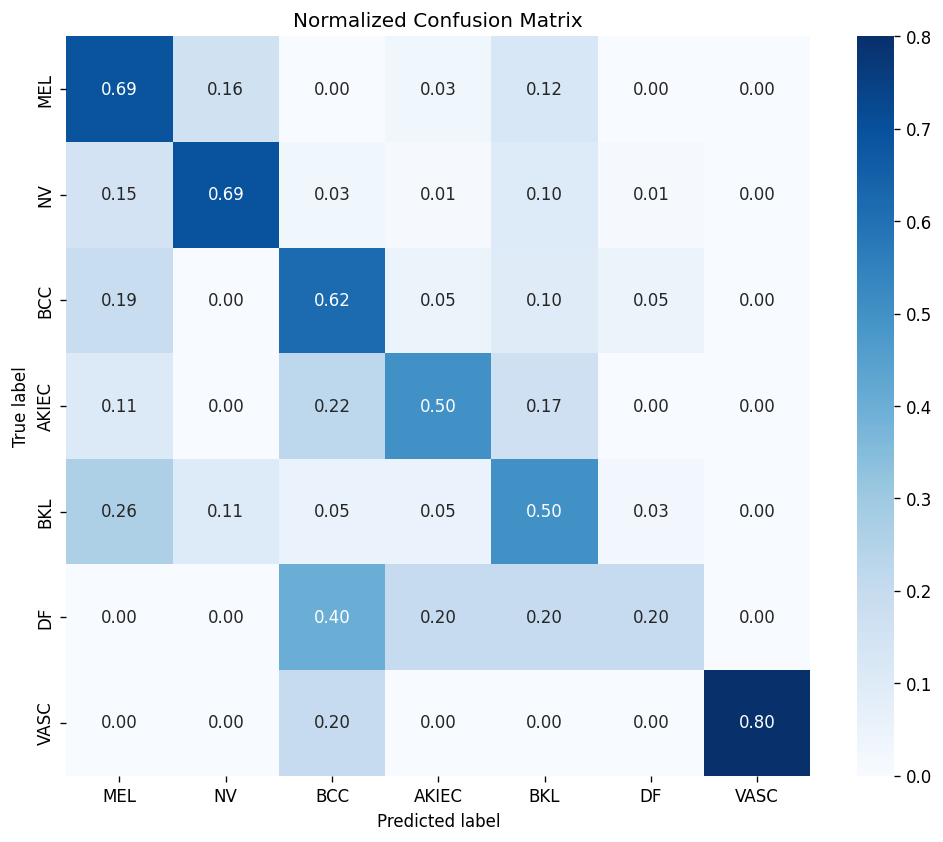

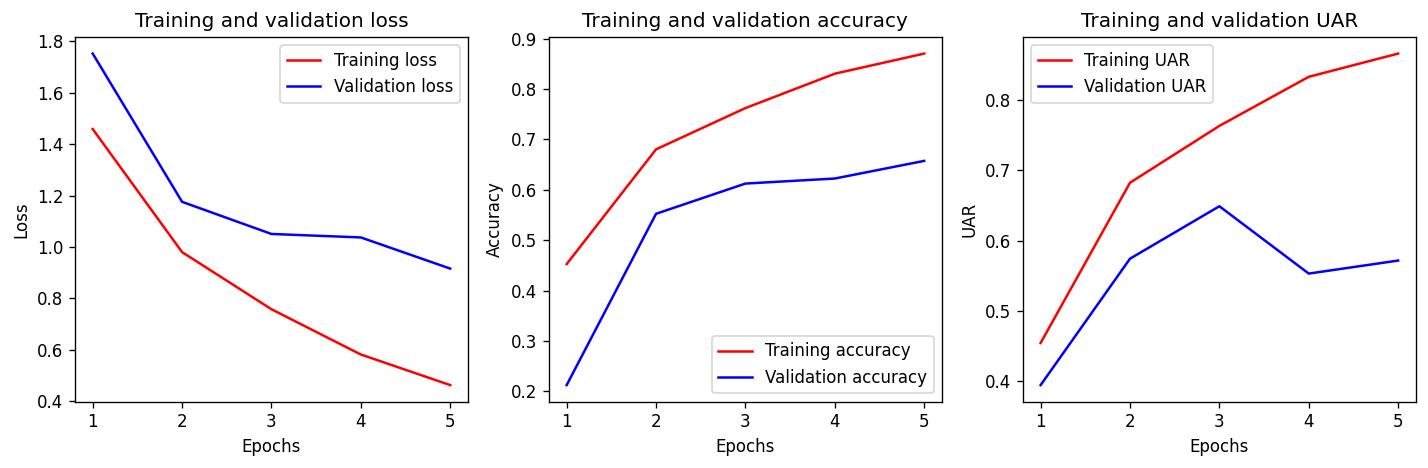

In [13]:
#Modifying LesionDataset Class to augment


class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values
        self.augment = augment

        if self.augment:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(0.5),
                transforms.RandomRotation(30),
                transforms.ToTensor(),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
            ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

#loading datasets with augmentation

#DefinING the WeightedRandomSampler

from torch.utils.data.sampler import WeightedRandomSampler

# Calculate class weights
def get_class_weights(labels):
    class_counts = np.bincount(labels)
    total_samples = len(labels)
    class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
    return class_weights

# Calculate sample weights
def get_sample_weights(labels, class_weights):
    sample_weights = [class_weights[labels[i]] for i in range(len(labels))]
    return sample_weights

# Load datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'))
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'))

# Get labels from the dataset
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Calculate class and sample weights
class_weights = get_class_weights(train_labels)
sample_weights = get_sample_weights(train_labels, class_weights)

# Create the WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

#training the model again

# Instantiate and move the model to the device
num_classes = 7
model = SimpleBNConv(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model for 5 epochs and collect metrics
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

# Plotting
epochs = range(1, 6)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(epochs, train_losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracies, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, train_uars, 'r', label='Training UAR')
plt.plot(epochs, val_uars, 'b', label='Validation UAR')
plt.title('Training and validation UAR')
plt.xlabel('Epochs')
plt.ylabel('UAR')
plt.legend()

plt.tight_layout()
plt.show()


## Task 1f. Chase improved performance

**MARKS**: 15 (Code and reports not separable for this task)

**INSTRUCTIONS**:
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze the weights of all layers except the last, or fine-tune all the weights. https://cloudstor.aarnet.edu.au/plus/s/TsYJXyJWch0h7TD
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report.

Write a discussion about the key findings from the experimental results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

In [14]:
#resnet18 with batch size 8 learning rate - 0.0001 epochs - 10
!pip install wandb torchvision

import os
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
from tqdm.notebook import tqdm
from datetime import datetime
import wandb
from torchvision import models

# Initialize Weights & Biases project
wandb.init(project="lesion-classification", name="improved-performance-experiment")

# Define the LesionDataset class with augmentation flag
class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values
        self.augment = augment
        self.transform = self.get_transform()

    def get_transform(self):
        transform_list = [transforms.Resize((224, 224)), transforms.ToTensor()]
        if self.augment:
            transform_list.extend([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
            ])
        return transforms.Compose(transform_list)

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

# Define the directory paths
data_dir = '/content/data/img'

# Load datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'), augment=True)
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'), augment=False)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

def train_epoch(epoch, model, optimizer, criterion, loader, num_classes, device):
    model.train()
    train_loss = torchmetrics.MeanMetric().to(device)
    train_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes).to(device)
    train_uar = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average='macro').to(device)

    for i, (inputs, lbls) in enumerate(loader):
        try:
            inputs, lbls = inputs.to(device), lbls.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, lbls)
            loss.backward()
            optimizer.step()

            train_loss.update(loss)
            train_accuracy.update(outputs, lbls)
            train_uar.update(outputs, lbls)
        except Exception as e:
            print(f"Error during training at batch {i}: {e}")

    metrics_dict = {
        'Loss_train': train_loss.compute().item(),
        'Accuracy_train': train_accuracy.compute().item(),
        'UAR_train': train_uar.compute().item(),
    }

    wandb.log(metrics_dict)

    return metrics_dict

def val_epoch(epoch, model, criterion, loader, num_classes, device):
    model.eval()
    val_loss = torchmetrics.MeanMetric().to(device)
    val_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes).to(device)
    val_uar = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average='macro').to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for i, (inputs, lbls) in enumerate(loader):
            try:
                inputs, lbls = inputs.to(device), lbls.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, lbls)

                val_loss.update(loss)
                val_accuracy.update(outputs, lbls)
                val_uar.update(outputs, lbls)

                all_preds.append(outputs.argmax(dim=1))
                all_labels.append(lbls)
            except Exception as e:
                print(f"Error during validation at batch {i}: {e}")

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    cm = torchmetrics.functional.confusion_matrix(all_labels, all_preds, num_classes=num_classes, normalize='true', task='multiclass').cpu().numpy()

    metrics_dict = {
        'Loss_val': val_loss.compute().item(),
        'Accuracy_val': val_accuracy.compute().item(),
        'UAR_val': val_uar.compute().item(),
    }

    wandb.log(metrics_dict)

    return metrics_dict, cm

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, class_names):
    train_losses, train_accuracies, train_uars = [], [], []
    val_losses, val_accuracies, val_uars, conf_matrices = [], [], [], []

    for epoch in tqdm(range(num_epochs)):
        print('Starting epoch %d/%d' % (epoch + 1, num_epochs))
        train_metrics = train_epoch(epoch, model, optimizer, criterion, train_loader, len(class_names), device)
        val_metrics, cm = val_epoch(epoch, model, criterion, val_loader, len(class_names), device)

        print('Epoch %d/%d' % (epoch + 1, num_epochs))
        print('Train Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (train_metrics["Loss_train"], train_metrics["Accuracy_train"], train_metrics["UAR_train"]))
        print('Val Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (val_metrics["Loss_val"], val_metrics["Accuracy_val"], val_metrics["UAR_val"]))

        train_losses.append(train_metrics['Loss_train'])
        train_accuracies.append(train_metrics['Accuracy_train'])
        train_uars.append(train_metrics['UAR_train'])
        val_losses.append(val_metrics['Loss_val'])
        val_accuracies.append(val_metrics['Accuracy_val'])
        val_uars.append(val_metrics['UAR_val'])
        conf_matrices.append(cm)

    return train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars, conf_matrices

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)

# Freeze all layers except the last
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Move the model to the device
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001)

# Train the model
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars, conf_matrices = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=10, class_names=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'])

# Save the results
wandb.save('resnet18_model.pth')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]


  0%|          | 0/10 [00:00<?, ?it/s]

Starting epoch 1/10


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: 28 NaN values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)


Epoch 1/10
Train Loss: 1.126, Accuracy: 0.670, UAR: 0.147
Val Loss: 0.950, Accuracy: 0.710, UAR: 0.157
Starting epoch 2/10


/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: 35 NaN values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)


Epoch 2/10
Train Loss: 1.004, Accuracy: 0.686, UAR: 0.151
Val Loss: 0.882, Accuracy: 0.717, UAR: 0.172
Starting epoch 3/10
Epoch 3/10
Train Loss: 0.959, Accuracy: 0.691, UAR: 0.163
Val Loss: 0.848, Accuracy: 0.717, UAR: 0.198
Starting epoch 4/10


/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: 14 NaN values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)


Epoch 4/10
Train Loss: 0.922, Accuracy: 0.698, UAR: 0.178
Val Loss: 0.801, Accuracy: 0.730, UAR: 0.226
Starting epoch 5/10


/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: 21 NaN values found in confusion matrix have been replaced with zeros.
  warnings.warn(*args, **kwargs)


Epoch 5/10
Train Loss: 0.913, Accuracy: 0.699, UAR: 0.184
Val Loss: 0.806, Accuracy: 0.717, UAR: 0.207
Starting epoch 6/10
Epoch 6/10
Train Loss: 0.890, Accuracy: 0.701, UAR: 0.197
Val Loss: 0.772, Accuracy: 0.730, UAR: 0.224
Starting epoch 7/10
Epoch 7/10
Train Loss: 0.875, Accuracy: 0.707, UAR: 0.208
Val Loss: 0.764, Accuracy: 0.728, UAR: 0.224
Starting epoch 8/10
Epoch 8/10
Train Loss: 0.871, Accuracy: 0.702, UAR: 0.200
Val Loss: 0.749, Accuracy: 0.743, UAR: 0.267
Starting epoch 9/10
Epoch 9/10
Train Loss: 0.855, Accuracy: 0.711, UAR: 0.222
Val Loss: 0.745, Accuracy: 0.728, UAR: 0.225
Starting epoch 10/10
Epoch 10/10
Train Loss: 0.847, Accuracy: 0.716, UAR: 0.231
Val Loss: 0.760, Accuracy: 0.730, UAR: 0.217


[]

In [ ]:
#resnet18 with batch size 8 learning rate - 0.0001 epochs - 10

import os
import pandas as pd
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
from tqdm.notebook import tqdm
from datetime import datetime
import wandb
from torchvision import models

# Initialize Weights & Biases project
wandb.init(project="lesion-classification", name="RESNET18")

# Define the LesionDataset class with augmentation flag
class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values
        self.augment = augment
        self.transform = self.get_transform()

    def get_transform(self):
        transform_list = [transforms.Resize((224, 224)), transforms.ToTensor()]
        if self.augment:
            transform_list.extend([
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
            ])
        return transforms.Compose(transform_list)

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

# Define the directory paths
data_dir = '/content/data/img'

# Load datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'), augment=True)
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'), augment=False)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

def train_epoch(epoch, model, optimizer, criterion, loader, num_classes, device):
    model.train()
    train_loss = torchmetrics.MeanMetric().to(device)
    train_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes).to(device)
    train_uar = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average='macro').to(device)

    for i, (inputs, lbls) in enumerate(loader):
        try:
            inputs, lbls = inputs.to(device), lbls.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, lbls)
            loss.backward()
            optimizer.step()

            train_loss.update(loss)
            train_accuracy.update(outputs, lbls)
            train_uar.update(outputs, lbls)
        except Exception as e:
            print(f"Error during training at batch {i}: {e}")

    metrics_dict = {
        'Loss_train': train_loss.compute().item(),
        'Accuracy_train': train_accuracy.compute().item(),
        'UAR_train': train_uar.compute().item(),
    }

    wandb.log(metrics_dict)

    return metrics_dict

def val_epoch(epoch, model, criterion, loader, num_classes, device):
    model.eval()
    val_loss = torchmetrics.MeanMetric().to(device)
    val_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes).to(device)
    val_uar = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average='macro').to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for i, (inputs, lbls) in enumerate(loader):
            try:
                inputs, lbls = inputs.to(device), lbls.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, lbls)

                val_loss.update(loss)
                val_accuracy.update(outputs, lbls)
                val_uar.update(outputs, lbls)

                all_preds.append(outputs.argmax(dim=1))
                all_labels.append(lbls)
            except Exception as e:
                print(f"Error during validation at batch {i}: {e}")

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    cm = torchmetrics.functional.confusion_matrix(all_labels, all_preds, num_classes=num_classes, normalize='true', task='multiclass').cpu().numpy()

    metrics_dict = {
        'Loss_val': val_loss.compute().item(),
        'Accuracy_val': val_accuracy.compute().item(),
        'UAR_val': val_uar.compute().item(),
    }

    wandb.log(metrics_dict)

    return metrics_dict, cm

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, class_names):
    train_losses, train_accuracies, train_uars = [], [], []
    val_losses, val_accuracies, val_uars, conf_matrices = [], [], [], []

    for epoch in tqdm(range(num_epochs)):
        print('Starting epoch %d/%d' % (epoch + 1, num_epochs))
        train_metrics = train_epoch(epoch, model, optimizer, criterion, train_loader, len(class_names), device)
        val_metrics, cm = val_epoch(epoch, model, criterion, val_loader, len(class_names), device)

        print('Epoch %d/%d' % (epoch + 1, num_epochs))
        print('Train Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (train_metrics["Loss_train"], train_metrics["Accuracy_train"], train_metrics["UAR_train"]))
        print('Val Loss: %.3f, Accuracy: %.3f, UAR: %.3f' % (val_metrics["Loss_val"], val_metrics["Accuracy_val"], val_metrics["UAR_val"]))

        train_losses.append(train_metrics['Loss_train'])
        train_accuracies.append(train_metrics['Accuracy_train'])
        train_uars.append(train_metrics['UAR_train'])
        val_losses.append(val_metrics['Loss_val'])
        val_accuracies.append(val_metrics['Accuracy_val'])
        val_uars.append(val_metrics['UAR_val'])
        conf_matrices.append(cm)

    return train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars, conf_matrices

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)

# Freeze all layers except the last
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Move the model to the device
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Train the model
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars, conf_matrices = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=16, class_names=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'])

# Save the results
wandb.save('resnet18_model.pth')

In [ ]:
#CNN model  learning rate to 0.0005, set the batch size to 16, and run for 8 epochs.
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import numpy as np
import wandb
import getpass

# Prompt for wandb API key if needed and log in
api_key = getpass.getpass("Enter your wandb API key: ")
wandb.login(key=api_key)

# Initialize wandb for tracking experiments
wandb.init(project="lesion-classification")

# Set up device to GPU if available, else fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.enabled = False  # Disable cuDNN

# Define the LesionDataset class
class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        # Check if image_ids are strings; if not, convert them
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values

        # Set up transformations with or without augmentation
        if augment:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(30),
                transforms.ToTensor(),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
            ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

# Define training and validation functions
def train_epoch(model, optimizer, criterion, loader, device):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []

    for inputs, lbls in loader:
        inputs, lbls = inputs.to(device), lbls.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += lbls.size(0)
        correct += (predicted == lbls).sum().item()
        all_labels.extend(lbls.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    train_loss /= len(loader.dataset)

    return {'loss': train_loss, 'accuracy': accuracy, 'uar': uar}

def val_epoch(model, criterion, loader, device):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []

    with torch.no_grad():
        for inputs, lbls in loader:
            inputs, lbls = inputs.to(device), lbls.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, lbls)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
            all_labels.extend(lbls.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    val_loss /= len(loader.dataset)
    cm = confusion_matrix(all_labels, all_preds, normalize='true')

    return {'loss': val_loss, 'accuracy': accuracy, 'uar': uar}, cm

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Normalized Confusion Matrix')
    plt.show()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

    for epoch in tqdm(range(num_epochs)):
        train_metrics = train_epoch(model, optimizer, criterion, train_loader, device)
        val_metrics, cm = val_epoch(model, criterion, val_loader, device)

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {train_metrics["loss"]:.4f}, Train Accuracy: {train_metrics["accuracy"]:.4f}, Train UAR: {train_metrics["uar"]:.4f}, '
              f'Val Loss: {val_metrics["loss"]:.4f}, Val Accuracy: {val_metrics["accuracy"]:.4f}, Val UAR: {val_metrics["uar"]:.4f}')

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_metrics["loss"],
            "train_accuracy": train_metrics["accuracy"],
            "train_uar": train_metrics["uar"],
            "val_loss": val_metrics["loss"],
            "val_accuracy": val_metrics["accuracy"],
            "val_uar": val_metrics["uar"]
        })

    plot_confusion_matrix(cm, class_names)

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the directory paths
data_dir = '/content/data/img'

# Load datasets with augmentation disabled
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'), augment=False)
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'), augment=False)

# Get labels from the dataset
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Calculate class and sample weights
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
sample_weights = [class_weights[train_labels[i]] for i in range(len(train_labels))]

# Create the WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoader for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)

# Instantiate and move the model to the device
num_classes = 7
model = CNNModel(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model for 8 epochs and collect metrics
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=8)

<a name="task-1-model-training"></a>
## Model Training Cell

Note we will be using Weights and Biases to keep track of our experimental runs and evaluation metrics. This is similar to lab 6. Please see lab 6 to learn how to use Weights and Biases.


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64
LEARNING_RATE = 0.0001

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
# Loading datasets
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'))
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'))

# Creating DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# TODO Task 1d - Account for data issues, if applicable

# Calculating class and sample weights
class_weights = train.get_class_weights(train_labels)
sample_weights = train.get_sample_weights(train_labels, class_weights)

#DefinING the WeightedRandomSampler
from torch.utils.data.sampler import WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)



# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model, specifiy the optimizer and criterion you want to use

# model
# Defining the SimpleBNConv model
class SimpleBNConv(nn.Module):
    def __init__(self, num_classes):
        super(SimpleBNConv, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = self.pool(self.relu(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleBNConv(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.


# Setting an identifier for the task
ident_str = 'lr0001_aug_bs64'

# Train the model for 5 epochs and collect metrics
train_losses, train_accuracies, train_uars, val_losses, val_accuracies, val_uars = train.train_model(
    model, train_loader, val_loader, optimizer, criterion,
    IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
    ident_str=ident_str


In [ ]:
#I have redifned the train model function to prevent the error from using the function example above

import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import numpy as np
import wandb
import getpass

# Prompt for wandb API key if needed and log in
api_key = getpass.getpass("Enter your wandb API key: ")
wandb.login(key=api_key)

# Initialize wandb for tracking experiments
wandb.init(project="lesion-classification")

# Set up device to GPU if available, else fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.enabled = False  # Disable cuDNN

# Define the LesionDataset class
class LesionDataset(Dataset):
    def __init__(self, img_dir, labels_fname, augment=False):
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_fname)
        self.image_ids = self.labels_df['image']
        # Check if image_ids are strings; if not, convert them
        if not isinstance(self.image_ids.iloc[0], str):
            self.image_ids = self.image_ids.astype(str)
        self.labels = self.labels_df.iloc[:, 1:].values

        # Set up transformations with or without augmentation
        if augment:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(30),
                transforms.ToTensor(),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
            ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids[idx] + '.jpg')
        image = Image.open(img_name).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx].argmax()
        return image, label

# Define training and validation functions
def train_epoch(model, optimizer, criterion, loader, device):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []

    for inputs, lbls in loader:
        inputs, lbls = inputs.to(device), lbls.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += lbls.size(0)
        correct += (predicted == lbls).sum().item()
        all_labels.extend(lbls.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    train_loss /= len(loader.dataset)

    return {'loss': train_loss, 'accuracy': accuracy, 'uar': uar}

def val_epoch(model, criterion, loader, device):
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    all_labels, all_preds = [], []

    with torch.no_grad():
        for inputs, lbls in loader:
            inputs, lbls = inputs.to(device), lbls.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, lbls)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += lbls.size(0)
            correct += (predicted == lbls).sum().item()
            all_labels.extend(lbls.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = correct / total
    uar = recall_score(all_labels, all_preds, average='macro')
    val_loss /= len(loader.dataset)
    cm = confusion_matrix(all_labels, all_preds, normalize='true')

    return {'loss': val_loss, 'accuracy': accuracy, 'uar': uar}, cm

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Normalized Confusion Matrix')
    plt.show()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

    for epoch in tqdm(range(num_epochs)):
        train_metrics = train_epoch(model, optimizer, criterion, train_loader, device)
        val_metrics, cm = val_epoch(model, criterion, val_loader, device)

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {train_metrics["loss"]:.4f}, Train Accuracy: {train_metrics["accuracy"]:.4f}, Train UAR: {train_metrics["uar"]:.4f}, '
              f'Val Loss: {val_metrics["loss"]:.4f}, Val Accuracy: {val_metrics["accuracy"]:.4f}, Val UAR: {val_metrics["uar"]:.4f}')

        # Log metrics to wandb
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_metrics["loss"],
            "train_accuracy": train_metrics["accuracy"],
            "train_uar": train_metrics["uar"],
            "val_loss": val_metrics["loss"],
            "val_accuracy": val_metrics["accuracy"],
            "val_uar": val_metrics["uar"]
        })

    plot_confusion_matrix(cm, class_names)

# Define the SimpleBNConv model
class SimpleBNConv(nn.Module):
    def __init__(self, num_classes):
        super(SimpleBNConv, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.pool(self.relu(self.bn4(self.conv4(x))))
        x = self.pool(self.relu(self.bn5(self.conv5(x))))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the directory paths
data_dir = '/content/data/img'

# Load datasets with augmentation disabled
train_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'train.csv'), augment=False)
val_dataset = LesionDataset(data_dir, os.path.join(data_dir, 'val.csv'), augment=False)

# Get labels from the dataset
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]

# Calculate class and sample weights
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = [total_samples / class_counts[i] for i in range(len(class_counts))]
sample_weights = [class_weights[train_labels[i]] for i in range(len(train_labels))]

# Create the WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# Create DataLoader for training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, pin_memory=True)

# Instantiate and move the model to the device
num_classes = 7
model = SimpleBNConv(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model for 5 epochs and collect metrics
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)

# Task 2 - News article classification

**MARKS**: 32

You will first create your own model to classify news articles into one of the following classes:

*   World
*   Sport
*   Business
*   Sci/Tech

You will then compare it to a pre-trained DistilBERT model that has been fine-tuned, similar to Lab 6. Note: using a model pre-trained on a source task for a new target task is called "transfer learning" whether you fine-tune it or not.

The data for this task is a subset of: https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv

## Task 2a. Exploring the dataset

**MARKS**: 3 (Code 2, Reports 1)

**INSTRUCTIONS**: Check for at least 2 data issues.

**REPORT**: What did you check for? What data issues exist, if any? Report anything you checked even if it turned out the data did not have that issue. We want to know what you are checking.

In [ ]:
import pandas as pd

with open('/content/data/txt/classes.txt') as f:
    TXT_CLASS_NAMES = [line.rstrip('\n') for line in f]

train_df = pd.read_csv('/content/data/txt/train.csv', header=None)
val_df = pd.read_csv('/content/data/txt/val.csv', header=None)
train_df.head()

,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


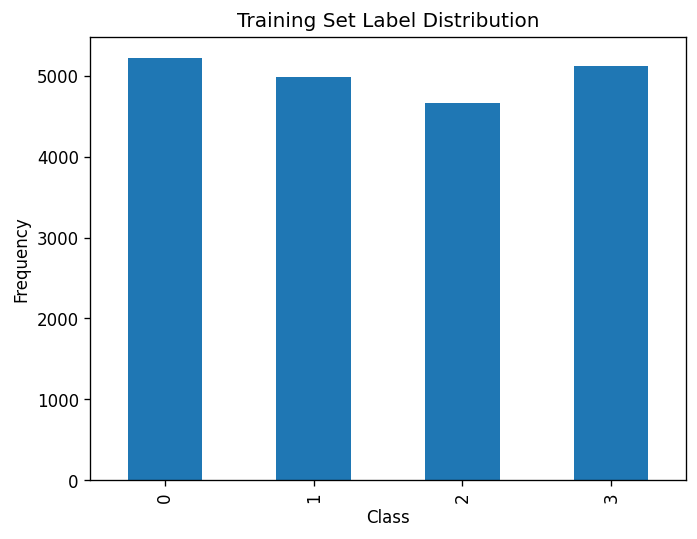

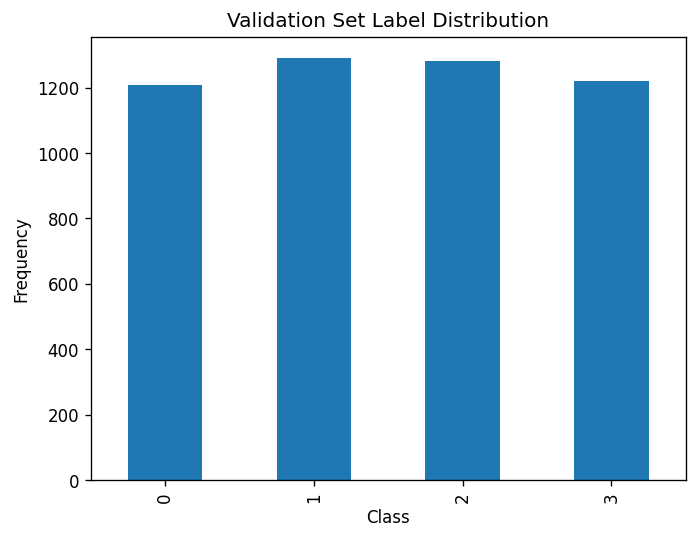

Missing values in training set:
 0    0
1    0
2    0
dtype: int64
Missing values in validation set:
 0    0
1    0
2    0
dtype: int64
Number of duplicate entries in training set: 8
Number of duplicate entries in validation set: 4


In [ ]:
import explore
# TODO Check for data issues.

# Adjust class labels to start from 0
train_labels = train_df[0] - 1
val_labels = val_df[0] - 1

# Add adjusted labels back to the DataFrame
train_df[0] = train_labels
val_df[0] = val_labels

# Again you should fill in the following:
# train_labels = ...
# val_labels = ....
#   - Note the csv file has class labels start from 1 but
#     pytorch expects class labels to start from 0 instead.
#
# explore.plot_label_distribution(....) for train labels
# explore.plot_label_distribution(....) for val labels
#
# check for other kinds of problems with the data like you did for Task 1a.
# Hypothetical function to plot label distribution
def plot_label_distribution(labels, title):
    import matplotlib.pyplot as plt
    labels.value_counts().sort_index().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Plot label distributions
plot_label_distribution(train_labels, 'Training Set Label Distribution')
plot_label_distribution(val_labels, 'Validation Set Label Distribution')

# Checking for missing values in training set
missing_values_train = train_df.isnull().sum()
print("Missing values in training set:\n", missing_values_train)

# Checking for missing values in validation set
missing_values_val = val_df.isnull().sum()
print("Missing values in validation set:\n", missing_values_val)

# Checking for duplicate entries in training set
duplicate_entries_train = train_df.duplicated().sum()
print(f"Number of duplicate entries in training set: {duplicate_entries_train}")

# Checking for duplicate entries in validation set
duplicate_entries_val = val_df.duplicated().sum()
print(f"Number of duplicate entries in validation set: {duplicate_entries_val}")



In [ ]:
# Removing duplicate entries
train_df = train_df.drop_duplicates()
val_df = val_df.drop_duplicates()

# Recheck for duplicates to confirm removal
duplicate_entries_train_after = train_df.duplicated().sum()
print(f"Number of duplicate entries in training set after removal: {duplicate_entries_train_after}")

duplicate_entries_val_after = val_df.duplicated().sum()
print(f"Number of duplicate entries in validation set after removal: {duplicate_entries_val_after}")

Number of duplicate entries in training set after removal: 0
Number of duplicate entries in validation set after removal: 0


## Task 2b. Clustering and visualising embeddings from a pre-trained model

**MARKS**: 14 (Code 11, Reports 3)

**INSTRUCTIONS**:

*  Implement the `TextDataset` class in the `datasets.py` file. Consider adding a small code block to test your implementation, as provided in task 1b.

*   Complete `visualise_embeddings.py` and run it. Make sure you instantiate two different models to visualize. One is the sequence classification model and the other is the token classification model. For the sequence classification model the code will visualize the CLS token. For the token classification model the model will perform average pool over all output tokens except the CLS token output. If you don't understand this. Please take a look at the Lab 6 demo notebook.
* The `visualise_embeddings.py` file does the following:
    *   visualise embeddings of the news articles from the two pre-trained `'distilbert-base-uncased'` model (i.e. the models which have not yet been fine-tuned on the labels) using T-SNE. T-SNE is a popular dimensionality reduction method that takes data from a high dimensional space and reduces it to just two dimensions while trying to preserve the right distances between points. The visualization will represent each article by a point with a color corresponding to their true label. Ideally the colors are well separated into separate clusters. If this happens it will be really cool since it means we did not even need to fine-tune the model on our data, it is already able to separate the classes.
    *   Next the code will run K-Means clustering on the validation set to group the data into separate clusters. The code will then colour the points based on which cluster they belong to rather than the ground truth label.


**REPORT**: By looking at the resulting images of the two models (sequence classification and token classification), which two classes have the most similar embeddings? How can you tell? Did you expect this, if so, why, if not why not?

**CHALLENGE**: (8 marks) Only attempt this after completing the rest of Task 2.

*   Modify `visualise_embeddings.py` so that it can load the weights for a fine-tuned DistilBERT model. Then visualize the data points with their corresponding true labels.
*   Next instead of using K-Means for the second visualisation, use the model's own predicted labels to colour the points.

Present the resulting images in your report.

In [ ]:
import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the sequence classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = True)

In [ ]:
import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the token classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = False)

In [ ]:
!pip install --upgrade transformers

import pandas as pd
import torch
from torch.utils.data import Dataset
from transformers import DistilBertTokenizer

class TextDataset(Dataset):
    def __init__(self, fname, sentence_len):
        self.data = pd.read_csv(fname, header=None)
        self.sentence_len = sentence_len
        self.tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

        # Adjust class labels to start from 0
        self.data[0] = self.data[0] - 1

        self.texts = self.data[2].values
        self.labels = self.data[0].values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.sentence_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

import numpy as np
import random
import sklearn.manifold
import sklearn.cluster
import torch
import torch.nn as nn
import tqdm.notebook as tq
from transformers import AutoModelForSequenceClassification, AutoModelForTokenClassification
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import datasets  # Assuming this imports the TextDataset class

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def as_masks(arr):
    n_classes = arr.max() + 1
    one_hot = np.eye(n_classes)[arr]
    return [m == 1 for m in one_hot.T]

def collect_outputs(dl, model, sequenceClassificationModel):
    collected_outputs = []
    collected_labels = []
    desc = 'Passing data through model'
    with torch.no_grad():
        for batch in tq.tqdm(dl, total=len(dl), desc=desc):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            collected_labels.append(labels.cpu().numpy())
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)

            if sequenceClassificationModel:
                hidden_states = outputs.hidden_states[-1]
                embedding = hidden_states[:, 0, :].cpu().numpy()
            else:
                hidden_states = outputs.hidden_states[-1]
                embedding = hidden_states[:, 1:, :].mean(dim=1).cpu().numpy()

            collected_outputs.append(embedding)

    collected_labels_np = np.concatenate(collected_labels)
    results_np = np.concatenate(collected_outputs)

    masks = as_masks(collected_labels_np)

    return results_np, masks

def fit_kmeans(embeddings, n_classes=4):
    kmeans = sklearn.cluster.KMeans(n_classes)
    class_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    pred = kmeans.fit_predict(embeddings)
    masks = as_masks(pred)
    return class_names, masks

def make_plottable(embeddings):
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=42)
    plottable = tsne.fit_transform(embeddings)
    return plottable

def plot_classifications(class_names, masks, arr, title):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i, mask in enumerate(masks):
        nm = class_names[i]
        ax.scatter(arr[mask][:, 0], arr[mask][:, 1], label=nm, alpha=0.2)
    leg = ax.legend()
    for lh in leg.legendHandles:
        lh.set_alpha(1)
    ax.set_title(title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

def mk_plots(sentence_len, sequenceClassificationModel=True):
    batch_size = 32
    dataset = datasets.TextDataset('/content/data/txt/val.csv', sentence_len)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    if sequenceClassificationModel:
        model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', output_hidden_states=True)
        method = 'CLS'
    else:
        model = AutoModelForTokenClassification.from_pretrained('distilbert-base-uncased', output_hidden_states=True)
        method = 'TOKEN'

    model.to(device)
    model.eval()

    print("Collecting embeddings...")
    embeds, label_masks = collect_outputs(dataloader, model, sequenceClassificationModel)
    print("Reducing dimensionality of embeddings...")
    plottable = make_plottable(embeds)

    with open('/content/data/txt/classes.txt') as f:
        class_names = [line.rstrip('\n') for line in f]

    plot_classifications(class_names, label_masks, plottable, 'True Labels')
    print("Fitting kmeans...")
    kmeans_names, kmeans_masks = fit_kmeans(embeds)
    plot_classifications(kmeans_names, kmeans_masks, plottable, 'Clustered Labels')

if __name__ == '__main__':
    SENTENCE_LEN = 80
    print("Visualizing sequence classification model embeddings...")
    mk_plots(SENTENCE_LEN, sequenceClassificationModel=True)

    print("Visualizing token classification model embeddings...")
    mk_plots(SENTENCE_LEN, sequenceClassificationModel=False)

import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the sequence classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = True)

import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the token classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = False)

## Task 2c. Models

**MARKS**: 10 (Code 7, Reports 3)

**INSTRUCTIONS**:

*   Complete `TextMLP` in `models.py`. It should be a simple MLP with 8 Linear layers. It should first embed the inputs into a vocabulary of size 30522. Use an output feature size of 256 in all hidden layers and a feature size of 128 for the embeddings. Flatten the sentence after embedding, but before it goes into any Linear layers. Use batch norm and ReLU. Train for 1000 epochs with learning rate of 0.001 and a batch size of 512.
*   Complete `DistilBertForClassification` in `models.py`. This model should replace the last layer with an `nn.Linear` with 4 outputs for classification. Hint: Call `print()` on the DistilBERT model to observe the layers and their names before attempting this. Train for 4 epochs with learning rate of 0.001 and a batch size of 64.

Each of these should take around 10 minutes to complete.

Go to the [Model Training Cell](#task-2-model-training) at the end of Task 2 and fill in the required code to train the model.

**REPORT**: The saved model weights of a fine-tuned DistilBERT model are >200MB, but you only created one small `nn.Linear` layer. Why is the saved model so large?

**REPORT**: These models should accept only input with a dtype of `torch.int64`. What do each of these longs (`int64`) represent?

In [ ]:
import torch
import torch.nn as nn

class TextMLP(nn.Module):
    def __init__(self, vocab_size, sentence_len, hidden_size, n_classes=4):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Embedding(vocab_size, 128),  # Embedding layer
            nn.Flatten(),  # Flattening the embeddings
            nn.Linear(sentence_len * 128, hidden_size),  # First linear layer
            nn.BatchNorm1d(hidden_size),  # Batch normalization
            nn.ReLU(),  # ReLU activation
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_classes)  # Output layer
        )

    def forward(self, x):
        return self.seq(x)

from transformers import DistilBertModel

class DistilBertForClassification(nn.Module):
    def __init__(self, n_classes=4):
        super(DistilBertForClassification, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(hidden_state)
        return logits

import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel
import torch.nn as nn
import torch.optim as optim
import tqdm.notebook as tq

# Define the TextDataset class
class TextDataset(Dataset):
    def __init__(self, fname, sentence_len):
        self.data = pd.read_csv(fname, header=None)
        self.sentence_len = sentence_len
        self.tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

        # Adjust class labels to start from 0
        self.data[0] = self.data[0] - 1

        self.texts = self.data[2].values
        self.labels = self.data[0].values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.sentence_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the TextMLP class
class TextMLP(nn.Module):
    def __init__(self, vocab_size, sentence_len, hidden_size, n_classes=4):
        super(TextMLP, self).__init__()
        self.seq = nn.Sequential(
            nn.Embedding(vocab_size, 128),  # Embedding layer
            nn.Flatten(),  # Flatten the embeddings
            nn.Linear(sentence_len * 128, hidden_size),  # First linear layer
            nn.BatchNorm1d(hidden_size),  # Batch normalization
            nn.ReLU(),  # ReLU activation
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_classes)  # Output layer
        )

    def forward(self, x):
        return self.seq(x)

# Define the DistilBertForClassification class
class DistilBertForClassification(nn.Module):
    def __init__(self, n_classes=4):
        super(DistilBertForClassification, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(hidden_state)
        return logits

# Function to train the model with early stopping and validation
def train_model(model, train_loader, val_loader, epochs, learning_rate, use_attention_mask=False, patience=10, accumulation_steps=2):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        optimizer.zero_grad()
        for i, batch in enumerate(train_loader):
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)
            if use_attention_mask:
                attention_mask = batch['attention_mask'].to(device)
                outputs = model(input_ids, attention_mask)
            else:
                outputs = model(input_ids)

            loss = criterion(outputs, labels)
            loss.backward()

            if (i + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss}')

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                labels = batch['label'].to(device)
                if use_attention_mask:
                    attention_mask = batch['attention_mask'].to(device)
                    outputs = model(input_ids, attention_mask)
                else:
                    outputs = model(input_ids)

                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss}')

        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print('Early stopping triggered')
            break

# Split dataset into training and validation sets
def split_dataset(dataset, val_split=0.2):
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    return torch.utils.data.random_split(dataset, [train_size, val_size])

# Training TextMLP
sentence_len = 80  # Adjust based on your dataset
vocab_size = 30522  # Standard vocabulary size for BERT-based models
hidden_size = 256
batch_size = 16  # Reduced batch size to fit GPU memory
epochs = 10  # Reduced epochs
learning_rate = 0.0001

text_dataset = TextDataset('/content/data/txt/train.csv', sentence_len)
train_dataset, val_dataset = split_dataset(text_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

text_mlp = TextMLP(vocab_size, sentence_len, hidden_size)
train_model(text_mlp, train_loader, val_loader, epochs, learning_rate, use_attention_mask=False)

# Training DistilBertForClassification
batch_size = 16  # Reduced batch size for DistilBERT model
epochs = 4  # Keep epochs for DistilBERT the same

distilbert_model = DistilBertForClassification()
train_model(distilbert_model, train_loader, val_loader, epochs, learning_rate, use_attention_mask=True)

## Task 2d. Learning Rate

**MARKS**: 5 (Code 0, Reports 5)

Fine-tuning `DistilBertForSequenceClassification` with Adam at a learning rate of 0.001 results in very poor accuracy (~26%).

**INSTRUCTIONS**:

*   Uncomment the lines marked `Task 2d` in `train.py`
*   Execute the below cell to begin training and observe the class distribution per batch
*   Comment the lines marked `Task 2d` in `train.py` so they no longer interfere with the training.


**REPORT**: What is wrong with the class distributions? The learning rate can be changed to fix it. Should you increase or decrease the learning rate? How can you tell?

**REPORT**: After fixing the learning rate, comment on the relative train/val performance between these two models. Which model performed better on each partition? Is this expected? If so, why?

When you have finished Task 2d. Go back to Task 2b and finish the challenge if you are up to it. You should get a pleasant surprise if you have done everything correctly.


In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertModel
import torch.nn as nn
import torch.optim as optim
import tqdm.notebook as tq

# Defining the TextDataset class
class TextDataset(Dataset):
    def __init__(self, fname, sentence_len):
        self.data = pd.read_csv(fname, header=None)
        self.sentence_len = sentence_len
        self.tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

        # Adjust class labels to start from 0
        self.data[0] = self.data[0] - 1

        self.texts = self.data[2].values
        self.labels = self.data[0].values

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.sentence_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# Define the DistilBertForClassification class
class DistilBertForClassification(nn.Module):
    def __init__(self, n_classes=4):
        super(DistilBertForClassification, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.distilbert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(hidden_state)
        return logits

# Function to count class distributions in the batch
def count_classes(outputs):
    _, predicted = torch.max(outputs, 1)
    class_counts = torch.bincount(predicted, minlength=4)
    return class_counts

# Function to train the model with early stopping, learning rate scheduler, and validation
def train_model(model, train_loader, val_loader, epochs, learning_rate, use_attention_mask=False, patience=10, accumulation_steps=2):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        optimizer.zero_grad()
        for i, batch in enumerate(train_loader):
            input_ids = batch['input_ids'].to(device)
            labels = batch['label'].to(device)
            if use_attention_mask:
                attention_mask = batch['attention_mask'].to(device)
                outputs = model(input_ids, attention_mask)
            else:
                outputs = model(input_ids)

            loss = criterion(outputs, labels)
            loss.backward()

            if (i + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item()

            # Task 2d: Temporarily uncomment these lines
           # print(count_classes(outputs))
            #if i > 9:
                #assert False

        epoch_loss = running_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss}')

        # Validation step
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                labels = batch['label'].to(device)
                if use_attention_mask:
                    attention_mask = batch['attention_mask'].to(device)
                    outputs = model(input_ids, attention_mask)
                else:
                    outputs = model(input_ids)

                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss}')

        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print('Early stopping triggered')
            break

# Split dataset into training and validation sets
def split_dataset(dataset, val_split=0.2):
    val_size = int(len(dataset) * val_split)
    train_size = len(dataset) - val_size
    return torch.utils.data.random_split(dataset, [train_size, val_size])

# Training DistilBertForClassification with adjusted learning rate
sentence_len = 80  # Adjust based on your dataset
batch_size = 32  # Reduced batch size for DistilBERT model
epochs = 5  # Adjusted epochs for demonstration
learning_rate = 0.00005  # Decreased learning rate

text_dataset = TextDataset('/content/data/txt/train.csv', sentence_len)
train_dataset, val_dataset = split_dataset(text_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

distilbert_model = DistilBertForClassification()
train_model(distilbert_model, train_loader, val_loader, epochs, learning_rate, use_attention_mask=True)

<a name="task-2-model-training"></a>
## Model Training Cell

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import datasets
import models
import train

torch.manual_seed(42)

SENTENCE_LEN = 80
NUM_EPOCHS = 4
BATCH_SIZE = 64
LEARNING_RATE = 0.0001

# Create datasets/loaders
# TODO: Create the data loaders from TextDatasets
train_dataset = datasets.TextDataset('/content/data/txt/train.csv', SENTENCE_LEN)
val_dataset = datasets.TextDataset('/content/data/txt/val.csv', SENTENCE_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Instantiate model, optimizer and criterion
# TODO: Make an instance of your model
model = models.DistilBertForClassification(n_classes=4)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# TODO Change ident_str to something that identifying this experiment e.g. lr0001
ident_str = 'lr0001_dropout'

# Train model. We are using the same train model function we wrote for task 1.
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  TXT_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 2",
                  ident_str=ident_str)

# Super challenge task

This challenge task is quite difficult and will really test your mastery of PyTorch and `nn.Linear` layers.

**MARKS**: 5

We can manually assign weights to an `nn.Linear` like this:


In [ ]:
import torch
import torch.nn as nn
lin = nn.Linear(10, 20)
manual_weights = torch.arange(20*10).reshape(lin.weight.shape)
lin.weight.data[:] = manual_weights
lin.bias.data[:] = 0

But this does not calculate anything useful. A Linear layer simply performs a weighted sum (plus bias). We can choose weights/biases to perform known operations.

**INSTRUCTIONS**:
1.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer adds 1 to it's input.
2.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer calculates `y = 3x + 2`.
3.   Given an `nn.Linear(4, 1)` layer, set the weights such that the layer calculates the average of it's inputs.
4.   Given an `nn.Linear(4, 2)` layer, set the weights such that the layer calculates both the average of it's inputs and the sum of the inputs.
5.   Given an `nn.Linear(3, 3)` layer, set the weights such that the layer returns the inputs, but in reverse order.
6.   Given an `nn.Linear(5, 2)` layer, set the weights such that the layer always returns `(4,2)`


Note: We would never use this in a deep learning model; this challenge is to prove that you understand the mathematics and coding mechanics of the `nn.Linear` layer.

In [ ]:
import sc1
sc1.test_1(sc1.modify_lin_1)
sc1.test_2(sc1.modify_lin_2)
sc1.test_3(sc1.modify_lin_3)
sc1.test_4(sc1.modify_lin_4)
sc1.test_5(sc1.modify_lin_5)
sc1.test_6(sc1.modify_lin_6)